<h2 style = "text-align:center">Lending Club Case Study</h2>

<h4 style = "text-align:left">Introdution</h4>
            The important objective of this data analysis is to measure the degree of risk that the borrower presents to the lender. It includes, based on the estimated probability assigning measurable numbers to the default of the borrower. In this case study we have such dataset,and our objective is to determine the potential borrowers to determine their ability to meet debt obligations. We have used python 3 along with numpy and pandas libraries to analyze the dataset.

<h4 style = "color : Sky black">Preparatory steps</h4>
The first step in data analysis is to remove the data errors that comes from the source. There are various types of data errors such as formatting errors, missing values, spelling inconsistencies and duplicate rows. Let's clean this errors one by one both rows and column wise.

<h3 style = "text-align:center">Data Cleaning</h3>
<p> First Import required Python libraries.</p>

In [2]:
import numpy as np
import pandas as pd

Load the loan.csv file into <b>DataFrame</b>
    <li>The data might contain too many commas, so I have used <b>error_bad_lines=False</b> to remove them.</li>
    <li>The data might contain encoding issues or mixed data type issues, so I have used <b>dtype='unicode'</b> to correct them.</li>
    <li>The column header starts at index zero, so given <b>header=0</b>.</li>

In [3]:
df = pd.read_csv("loan.csv", error_bad_lines=False, dtype='unicode', header=0)

In [4]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN


<h4>Delete columns that contain single value:</h4>
<p>There are 111 columns in the data, let's remove invalid columns which doesn't add any value for our analysis. Invalid column means the information could be same across all rows or all rows may contain NaN.

Print the count of unique values in each column to check if any single value column present.</p>

In [5]:
print(df.nunique())

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
                              ...  
tax_liens                         1
tot_hi_cred_lim                   0
total_bal_ex_mort                 0
total_bc_limit                    0
total_il_high_credit_limit        0
Length: 111, dtype: int64


<p>From the above result, it seems there are few single value or no value columns present. Let's count the number of single value and no value or NaN columns.</p>

In [6]:
single_val_col = [df.columns[i] for i,v in enumerate(df.nunique()) if v == 1]
print("Single Value columns Count:",len(single_val_col))

zero_val_col = [df.columns[i] for i,v in enumerate(df.nunique()) if v == 0]
print("Zero value columns count:", len(zero_val_col))

Single Value columns Count: 9
Zero value columns count: 54


There are nine columns contain single value lets remove those first.

In [7]:
df = df.drop(single_val_col, axis=1)
df.shape

(39717, 102)

There are 54 columns contain NaN value lets remove those also.

In [8]:
df = df.drop(zero_val_col, axis=1)
df.shape

(39717, 48)

Now we have only 48 columns left for further analysis.

In [9]:
pd.set_option('display.max_columns', None)
df.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000,Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,0,0,5863.155187,5833.84,5000,863.16,0,0,0,Jan-15,171.62,NaN,May-16,0
1,1077430,1314167,2500,2500,2500,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000,Source Verified,Dec-11,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,0,0,1008.71,1008.71,456.46,435.17,0,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0
2,1077175,1313524,2400,2400,2400,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252,Not Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,0,0,3005.666844,3005.67,2400,605.67,0,0,0,Jun-14,649.91,NaN,May-16,0


In [10]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'pub_rec_bankruptcies'],
      dtype='object')

<h4>Format the Column Data</h4>
Now let's do further cleansing, correct the column data of columns <b>term</b>, <b>int_rate</b>, <b>emp_length</b> to have proper data type.

In [11]:
np.unique(df['term'])

array([' 36 months', ' 60 months'], dtype=object)

In [12]:
df['term'] = df.term.apply(lambda t: int(t.strip().split(' ')[0]))
df.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975,36,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000,Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,0,0,5863.155187,5833.84,5000,863.16,0,0,0,Jan-15,171.62,NaN,May-16,0
1,1077430,1314167,2500,2500,2500,60,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000,Source Verified,Dec-11,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,0,0,1008.71,1008.71,456.46,435.17,0,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0
2,1077175,1313524,2400,2400,2400,36,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252,Not Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,0,0,3005.666844,3005.67,2400,605.67,0,0,0,Jun-14,649.91,NaN,May-16,0


In [13]:
np.unique(df['int_rate'])

array(['10.00%', '10.01%', '10.08%', '10.14%', '10.20%', '10.25%',
       '10.28%', '10.33%', '10.36%', '10.37%', '10.38%', '10.39%',
       '10.46%', '10.51%', '10.59%', '10.62%', '10.64%', '10.65%',
       '10.71%', '10.74%', '10.75%', '10.78%', '10.83%', '10.91%',
       '10.95%', '10.96%', '10.99%', '11.03%', '11.09%', '11.11%',
       '11.12%', '11.14%', '11.22%', '11.26%', '11.28%', '11.34%',
       '11.36%', '11.41%', '11.46%', '11.48%', '11.49%', '11.54%',
       '11.58%', '11.59%', '11.63%', '11.66%', '11.71%', '11.72%',
       '11.78%', '11.83%', '11.86%', '11.89%', '11.91%', '11.97%',
       '11.99%', '12.04%', '12.09%', '12.12%', '12.17%', '12.18%',
       '12.21%', '12.22%', '12.23%', '12.29%', '12.36%', '12.41%',
       '12.42%', '12.49%', '12.53%', '12.54%', '12.61%', '12.62%',
       '12.67%', '12.68%', '12.69%', '12.72%', '12.73%', '12.80%',
       '12.84%', '12.86%', '12.87%', '12.92%', '12.98%', '12.99%',
       '13.04%', '13.06%', '13.11%', '13.12%', '13.16%', '13.1

In [14]:
df['int_rate'] = df.int_rate.apply(lambda t: float(t.strip().replace('%','')))
df.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975,36,10.65,162.87,B,B2,NaN,10+ years,RENT,24000,Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,0,0,5863.155187,5833.84,5000,863.16,0,0,0,Jan-15,171.62,NaN,May-16,0
1,1077430,1314167,2500,2500,2500,60,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000,Source Verified,Dec-11,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,0,0,1008.71,1008.71,456.46,435.17,0,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0
2,1077175,1313524,2400,2400,2400,36,15.96,84.33,C,C5,NaN,10+ years,RENT,12252,Not Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,0,0,3005.666844,3005.67,2400,605.67,0,0,0,Jun-14,649.91,NaN,May-16,0


<b>emp_length</b> has some special characters lets clean that as well. If the emp length is less than 1 then replace it with 0.

In [15]:
df['emp_length'] = df.emp_length.apply(lambda x: str(x).replace('+',''))
df['emp_length'] = df.emp_length.apply(lambda x: str(x).strip().replace('years','').replace('year',''))
df['emp_length'] = df.emp_length.apply(lambda x: float(x.replace('< 1','0')) if '< 1' in x else float(x))
df['emp_length'].fillna(value = 0, inplace = True)


In [16]:
np.unique(df['emp_length'])

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [17]:
df.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975,36,10.65,162.87,B,B2,NaN,10.0,RENT,24000,Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,0,0,5863.155187,5833.84,5000,863.16,0,0,0,Jan-15,171.62,NaN,May-16,0
1,1077430,1314167,2500,2500,2500,60,15.27,59.83,C,C4,Ryder,0.0,RENT,30000,Source Verified,Dec-11,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,0,0,1008.71,1008.71,456.46,435.17,0,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0
2,1077175,1313524,2400,2400,2400,36,15.96,84.33,C,C5,NaN,10.0,RENT,12252,Not Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,0,0,3005.666844,3005.67,2400,605.67,0,0,0,Jun-14,649.91,NaN,May-16,0


In [18]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

Convert date and time related columns to date or timestamp type. We have <b>earliest_cr_line, issue_d, last_pymnt_d and  last_credit_pull_d</b> with month and year data. In addition to this, add additional columns both month and year wise. Convert this into valid date format. Let's write python function to do this conversion.

In [19]:
def convert_to_date(df, col_name):
    df[col_name] = pd.to_datetime(df[col_name], format = "%b-%y")
    df[col_name+'_month'] = df[col_name].dt.month
    df[col_name+'_year'] = df[col_name].dt.year
    

convert_to_date(df,'earliest_cr_line')

In [20]:
convert_to_date(df,'issue_d')
convert_to_date(df,'last_pymnt_d')
convert_to_date(df,'last_credit_pull_d')

In [21]:
df['issue_d'].describe(datetime_is_numeric=True) ### to avoid warning had to pass datetime_is_numeric=True

count                            39717
mean     2010-11-03 23:26:45.166553344
min                2007-06-01 00:00:00
25%                2010-05-01 00:00:00
50%                2011-02-01 00:00:00
75%                2011-08-01 00:00:00
max                2011-12-01 00:00:00
Name: issue_d, dtype: object

In [22]:
df.shape

(39717, 56)

Before proceed with further analysis, let's check if there is any <b>invalid</b> rows present.

In [23]:
df_missing = round(100*(df.isnull().sum()/len(df.id)), 2)
df_missing[df_missing != 0]

emp_title                    6.19
desc                        32.58
title                        0.03
mths_since_last_delinq      64.66
mths_since_last_record      92.99
revol_util                   0.13
last_pymnt_d                 0.18
next_pymnt_d                97.13
last_credit_pull_d           0.01
pub_rec_bankruptcies         1.75
last_pymnt_d_month           0.18
last_pymnt_d_year            0.18
last_credit_pull_d_month     0.01
last_credit_pull_d_year      0.01
dtype: float64

The desc column contains 32.58 missing data and the information available in this is not going to add any value. So let's remove desc column.

In [24]:
df = df.drop('desc',axis=1)

Let's check for columns that contains categorical values

In [25]:
df.nunique().sort_values()

term                            2
next_pymnt_d                    2
loan_status                     3
pub_rec_bankruptcies            3
verification_status             3
issue_d_year                    5
pub_rec                         5
home_ownership                  5
grade                           7
last_pymnt_d_year               9
inq_last_6mths                  9
last_credit_pull_d_year        10
delinq_2yrs                    11
emp_length                     11
last_credit_pull_d_month       12
earliest_cr_line_month         12
issue_d_month                  12
last_pymnt_d_month             12
purpose                        14
sub_grade                      35
open_acc                       40
addr_state                     50
earliest_cr_line_year          53
issue_d                        55
total_acc                      82
mths_since_last_delinq         95
last_pymnt_d                  101
last_credit_pull_d            106
mths_since_last_record        111
int_rate      

Job title and Employment length can have impact on loan repayment, rows without this data will not be useful. So let's remove the rows with <b>emp_length</b> and <b>emp_title</b>

In [26]:
df=df[~df.emp_title.isnull()]
df=df[~df.emp_length.isnull()]

In [27]:
df.shape

(37258, 55)

In addition to the above columns there are small percentage of missing rows for the following columns <b>title, revol_util</b> and <b>last_pymnt_d</b>. As per the data dictionary these data will be useful for our analysis. So, null values to these columns has to be removed.

In [28]:
df=df[~df.title.isnull()]
df=df[~df.revol_util.isnull()]
df=df[~df.last_pymnt_d.isnull()]

In [29]:
df.shape

(37143, 55)

The following columns <b>id, url, member_id </b>and <b> zip_code</b> not going to add any value to our analysis. So, droppping these columns. The columns <b>funded_amnt_inv </b>and <b> funded_amnt </b>  is the loan amount this also will not be useful for our objective.

In [30]:
clean_df = df.drop(['id', 'url', 'member_id','zip_code','funded_amnt_inv','funded_amnt'],axis=1)

In [31]:
clean_df.shape

(37143, 49)

Save this clean data into a new CSV file.

In [32]:
clean_df.to_csv('clean_loan.csv', encoding='utf-8', index=False)

With this data cleansing and formatting has completed. Next let's start with Univariate analysis.

<h3 style = "text-align:center">Analysis</h3>
        <p> We have loan status of 'Fully Paid', 'Charged Off' and 'Current'. The status 'Current' will not useful to determine the defaulters, so lets remove the records with status Current. Also create new column <b>loan_status_val</b> and give numerical values for 'Fully Paid'=0 and 'Charges Off'=1 </p>

In [33]:
loan_df = pd.read_csv('clean_loan.csv', encoding='utf-8',low_memory=False)

In [34]:
loan_df.loan_status.value_counts()

Fully Paid     31009
Charged Off     5067
Current         1067
Name: loan_status, dtype: int64

In [35]:
loan_df = loan_df[loan_df['loan_status'].isin(['Fully Paid','Charged Off'])]
loan_df['loan_status_val'] = loan_df.loan_status.apply(lambda x: 0 if x=='Fully Paid' else 1)
loan_df.shape

(36076, 50)

<h3 style = "text-align:center">Univariante Analysis</h3>

In [36]:
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
sns.set(style='whitegrid')

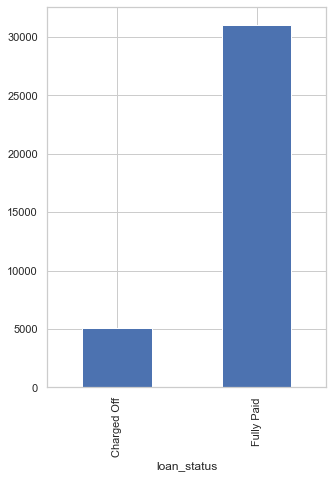

In [37]:
plt.figure(figsize=(5,7))
ax = loan_df.groupby('loan_status').loan_amnt.count().plot.bar()
plt.show()

In [38]:
loan_df.loc[loan_df['loan_status'] == 'Charged Off'].loan_status.count() * 100/len(loan_df)

14.045348708282514

As per the data around <b>14%</b> of loans have been defaulted.

In [39]:
print(loan_df.groupby('loan_status').total_pymnt.sum() * 100 / loan_df.groupby('loan_status').loan_amnt.sum())

loan_status
Charged Off     57.105279
Fully Paid     117.198192
dtype: float64


Out of all defaulted loans only <b>57 %</b> percentage of loans have been recovered.

<AxesSubplot:xlabel='loan_status'>

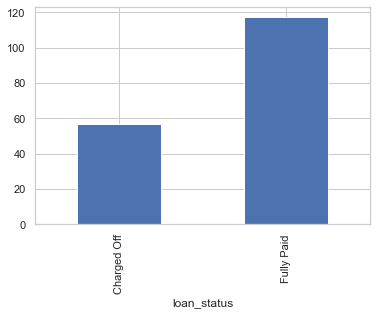

In [40]:
(loan_df.groupby('loan_status').total_pymnt.sum() * 100 / loan_df.groupby('loan_status').loan_amnt.sum()).plot.bar()

<b><h4>Variable: Loan Amount</h4></b>
Next let's take <b>loan_amt</b> variable for our analysis. As per data disctionary the loan_amnt is, <i>"The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value."</i>

In [41]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) ### To avoid future deprecation warnings

def plot_distribution(df, col):
    plt.figure(figsize=(15,5))
    plt.subplot(1, 2, 1)
    ax = sns.distplot(loan_df[col])
    plt.subplot(1, 2, 2)
    sns.boxplot(x=loan_df[col], y=loan_df['loan_status'], data=loan_df)
    plt.show()

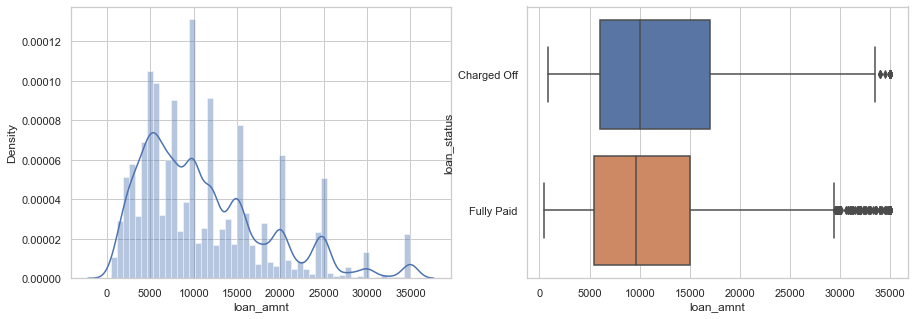

In [42]:
plot_distribution(loan_df, 'loan_amnt')

In [43]:
loan_df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5067.0,12285.726268,8046.182220,900.0,6000.0,10000.0,17000.0,35000.0
Fully Paid,31009.0,10917.830307,7165.659596,500.0,5400.0,9600.0,15000.0,35000.0


<h4> Observations:</h4>
    <li>Overall, the loan amount distribution is sligthly right sided with mean greater than the median. Seventy five percent(75%)of the  loans granted are below 15000.</li>
     <li>It is observed that there is a spike in loan amounts around each 5000 limit.</li>

Based on the above observations, lets create one more Categorical Variable with bin(limit) as 5000.

In [44]:
def LoanStatusPlot(df, by, loanstatus='Charged Off'):
    group = df.groupby(['loan_status',by])[by].count()
    count = df.groupby(by)[by].count()
    percentages = group.unstack() * 100 / count.T
    ax = percentages.loc[loanstatus].plot.bar(color=sns.color_palette('pastel', 16))
    ax.set_ylabel('% of loans ' + loanstatus)
    plt.margins(0.2, 0.2)
    plt.tight_layout()
    return ax

<AxesSubplot:xlabel='loan_amnt_bin', ylabel='% of loans Charged Off'>

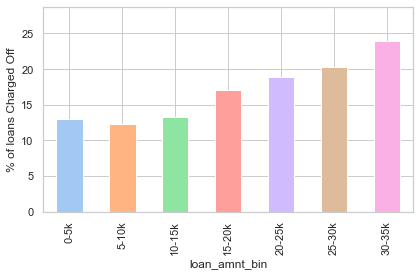

In [45]:
loan_df['loan_amnt_bin'] = pd.cut(loan_df['loan_amnt'], 
                                      [x for x in range(0, 36000, 5000)], labels=[str(x)+'-'+str(x+5)+'k' for x in range (0, 35, 5)])
LoanStatusPlot(loan_df, 'loan_amnt_bin')

<h4> Observations:</h4>
The percentage of charged off loans increase with the loan amount range. Even though, most of the loans are below 20000 amount. The higher loans, carry significant risk of default.

<b><h4>Variable: Grade</h4></b>
<p>Lets define a function to plot loan_status across categorical variables. Compare the default rates across different loan grades.</p>

In [46]:
def plot_cat(cat_var):
    sns.barplot(x=cat_var, y='loan_status_val', data=loan_df)
    plt.show()

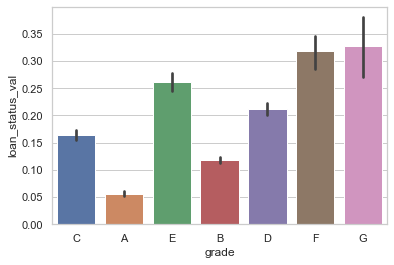

In [47]:
plot_cat('grade')

<b><h4>Variable: term</h4></b>

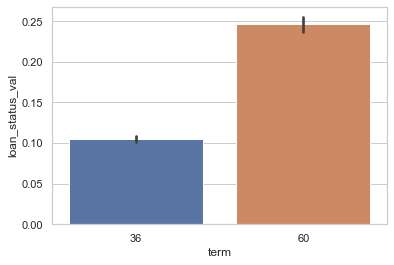

In [48]:
plot_cat('term')

<h4>Observation</h4>
Charged off bar is higher for the long term loans. It is risky to give higher loan amount with long term.

<b><h4>Variable: sub_grade</h4></b>

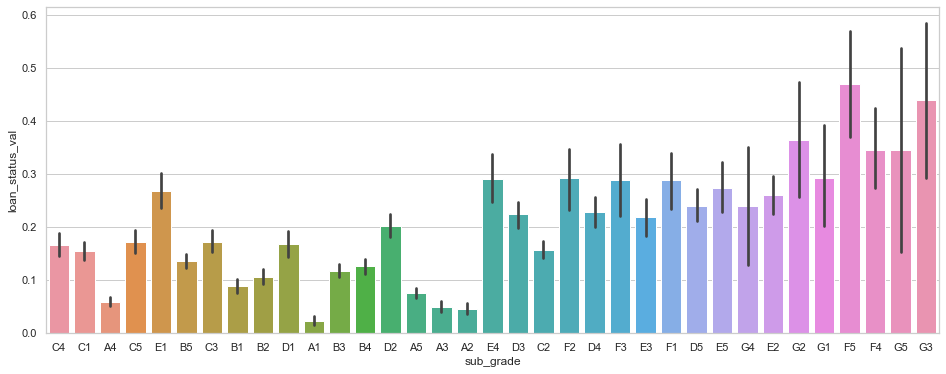

In [49]:
plt.figure(figsize=(16, 6))
plot_cat('sub_grade')

<h4>Observation</h4>
As expected the defaults rate is lesser for A1 and the same is higher for F5. The defaulter rate increase as the sub grade goes down.

<b><h4>Variable: home_ownership</h4></b>

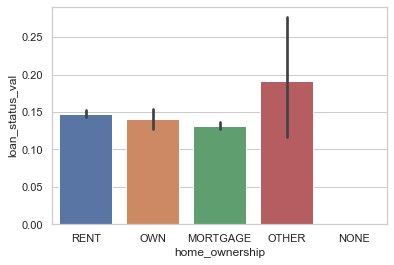

In [50]:
plot_cat('home_ownership')

<h4>Observation</h4>
The variable home_ownership did not make much differences in defaulter rate.

<b><h4>Variable: verification_status</h4></b>

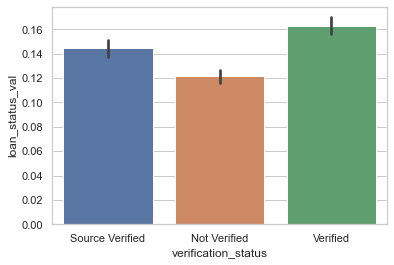

In [51]:
plot_cat('verification_status')

<h4>Observation</h4>
Interestingly the loans with Verified status has more loan defaults than Not Verified.

<b><h4>Variable: purpose</h4></b>

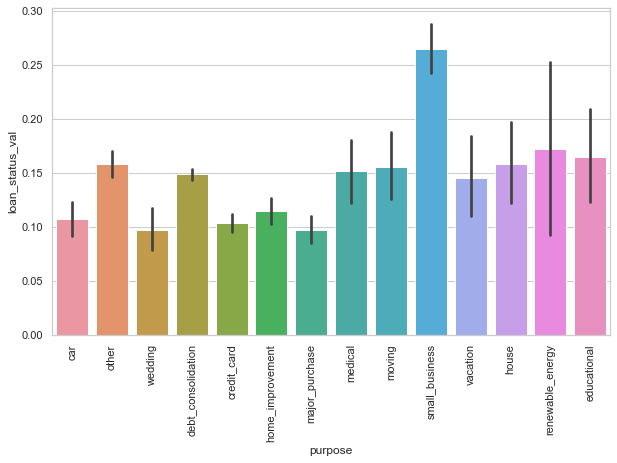

In [52]:
plt.figure(figsize=(10, 6))
# Align the labels on X-axis for clear label names
plt.xticks(rotation=90) 
plot_cat('purpose')

<h4>Observation</h4>
Small business has more loan defaults than the renewable energy and education loans.

Let's see the distribution of loans across years and on different months.

In [53]:
loan_df['issue_d'] = pd.to_datetime(loan_df['issue_d'], format = "%Y-%m-%d")
loan_df['issue_month'] = loan_df['issue_d'].apply(lambda x: x.month)
loan_df['issue_year'] = loan_df['issue_d'].apply(lambda x: x.year)

In [54]:
loan_df.groupby('issue_year').issue_year.count()

issue_year
2007      227
2008     1485
2009     4424
2010    10821
2011    19119
Name: issue_year, dtype: int64

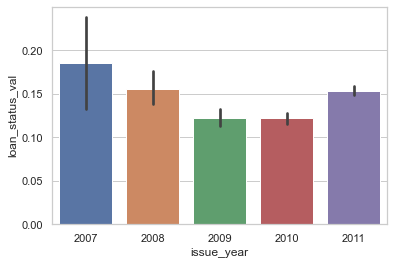

In [55]:
plot_cat('issue_year')

<h4>Observation</h4>
<li>Loans distribution count has increased steadily across years. </li>
<li>The default rate had continuously declined till 2010, and then suddenly increased in 2011.</li>

In [56]:
loan_df.groupby('issue_month').issue_month.count()

issue_month
1     2209
2     2185
3     2511
4     2673
5     2750
6     2980
7     3145
8     3221
9     3299
10    3483
11    3719
12    3901
Name: issue_month, dtype: int64

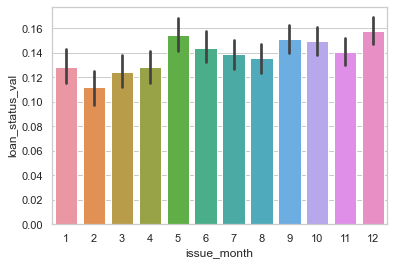

In [57]:
plot_cat('issue_month')

<h4>Observation</h4>
<li>More loans has distributed in the second half of the year.</li>
<li>When compared to default staus there is no much difference</li>

<h4>Variable int_rate</h4>
Let's see the impact of interest rate on loan defaults. Let's convert interest rate into three different categories(<b>low, medium</b> and <b>high</b>), it will be easy to plot it.

In [58]:
### 
def int_rate(n):
    if n <= 10:
        return 'low'
    elif n > 10 and n <=15:
        return 'medium'
    else:
        return 'high'
    
loan_df['int_rate_cat'] = loan_df['int_rate'].apply(lambda x: int_rate(x))

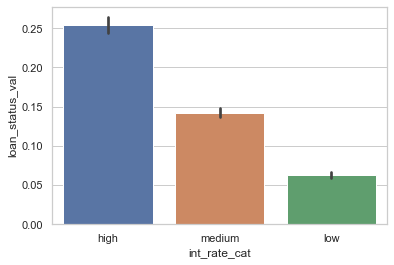

In [59]:
plot_cat('int_rate_cat')

<h4>Observation</h4>
<li>From the above chart, it is evident that the loan default increases when the interest rate is high.</li>

<h4>Variable: dti (debit income ratio)</h4>
Let's observe if debit to income ratio has impact on loan default.

In [60]:
def dti(n):
    if n <= 10:
        return 'low'
    elif n > 10 and n <=20:
        return 'medium'
    else:
        return 'high'
    
loan_df['dti_cat'] = loan_df['dti'].apply(lambda x: dti(x))

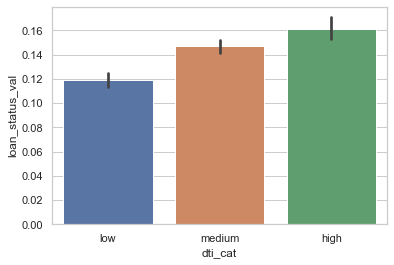

In [61]:
plot_cat('dti_cat')

<h4>Observation</h4>
As expected, high dti resulted in higher default rates.

<h4>Variable: installment</h4>
Let's comparing default rates across installment. Before that convert the installment amount into four different categories.
<li>low</li>
<li>medium</li>
<li>high</li>
<li>very high</li>

In [65]:
def installment(n):
    if n <= 200:
        return 'low'
    elif n > 200 and n <=400:
        return 'medium'
    elif n > 400 and n <=600:
        return 'high'
    else:
        return 'very high'
    
loan_df['installment_cat'] = loan_df['installment'].apply(lambda x: installment(float(x)))

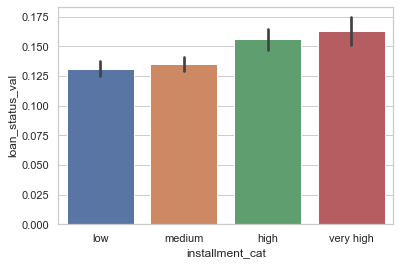

In [66]:
plot_cat('installment_cat')

<h4>Observation</h4>
The default rate increase as the installment amount goes up.

<h4>Variable: annual_inc</h4>
The annual income should have impact on the loan default. Before that convert the annual income into four different categories.
<li>low</li>
<li>medium</li>
<li>high</li>
<li>very high</li>

In [72]:
def annual_income(n):
    if n <= 50000:
        return 'low'
    elif n > 50000 and n <=100000:
        return 'medium'
    elif n > 100000 and n <=150000:
        return 'high'
    else:
        return 'very high'

loan_df['annual_inc_cat'] = loan_df['annual_inc'].apply(lambda x: annual_income(float(x)))

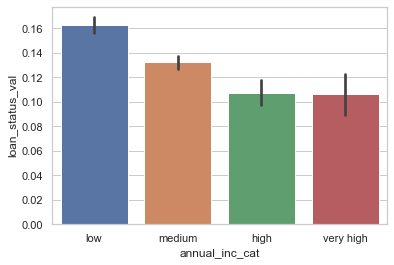

In [73]:
plot_cat('annual_inc_cat')

<h4>Observation</h4>
The charged off rate is high when the annual income is low.

<h3 style = "text-align:center">Segmented Univariate Analysis</h3>
    
So far we have seen different variables such as annual income, purpose of loan, grade, debit to income ratio and interest rate affected the loan defaults.

In the credit industry, one of the most important factors affecting default is the purpose of the loan - home loans perform differently than credit cards, credit cards are very different from debt condolidation loans etc.

Let's again have a look at the default rates across the purpose of the loan.

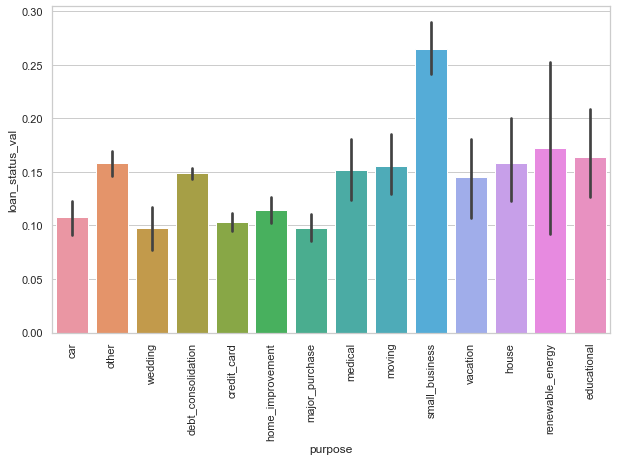

In [74]:
plt.figure(figsize=(10, 6))
plt.xticks(rotation=90) 
plot_cat('purpose')

For further analysis, we will segment the loan applications across the purpose of the loan, since that is a variable affecting many other variables such as the type of applicant, interest rate, income, and finally the default rate.

First let's see the number of loans in each type.

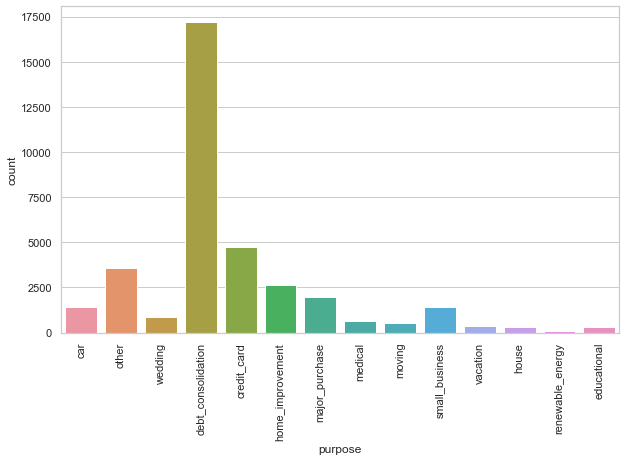

In [77]:
plt.figure(figsize=(10, 6))
plt.xticks(rotation=90)
sns.countplot(x='purpose', data=loan_df)
plt.show()

Let's analyse the top 4 types of loans based on purpose: debt consolidation, credit card, home improvement and major purchase.

In [78]:
major_purposes = ["credit_card","debt_consolidation","home_improvement","major_purchase"]
loan_df = loan_df[loan_df['purpose'].isin(major_purposes)]
loan_df['purpose'].value_counts()

debt_consolidation    17210
credit_card            4723
home_improvement       2661
major_purchase         1994
Name: purpose, dtype: int64

Plotting number of loans by purpose

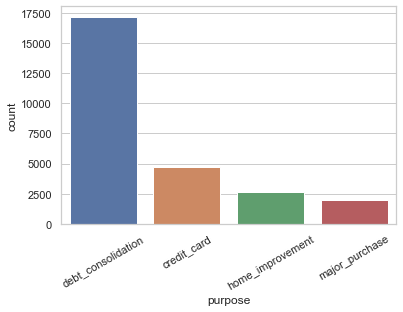

In [80]:
sns.countplot(x=loan_df['purpose'])
plt.xticks(rotation=30)
plt.show()

Now let's compare the default rates across two types of categorical variables, purpose of loan and another categorical variable.

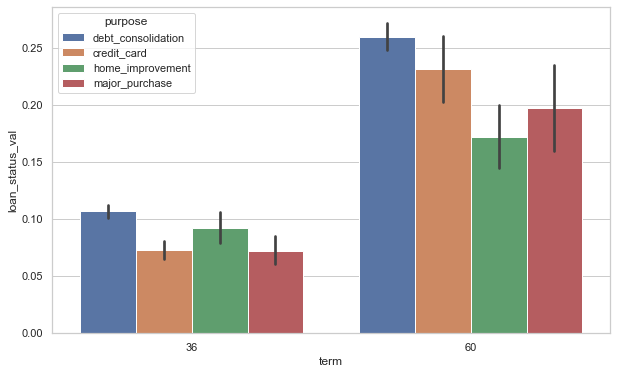

In [81]:
plt.figure(figsize=[10, 6])
sns.barplot(x='term', y="loan_status_val", hue='purpose', data=loan_df)
plt.show()

<b>Categorical Variable: term</b>

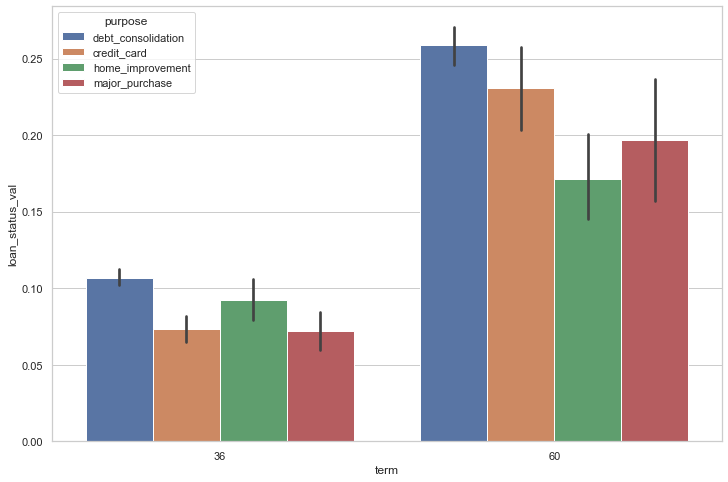

In [85]:
def plot_segmented(cat_var):
    plt.figure(figsize=(12, 8))
    sns.barplot(x=cat_var, y='loan_status_val', hue='purpose', data=loan_df)
    plt.show()

    
plot_segmented('term')

<b>Categorical Variable: grade</b>

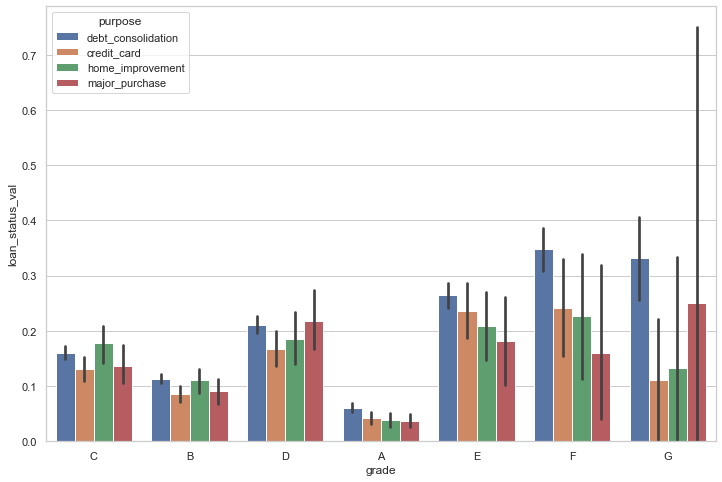

In [86]:
plot_segmented('grade')

<b>Categorical Variable: home_ownership</b>

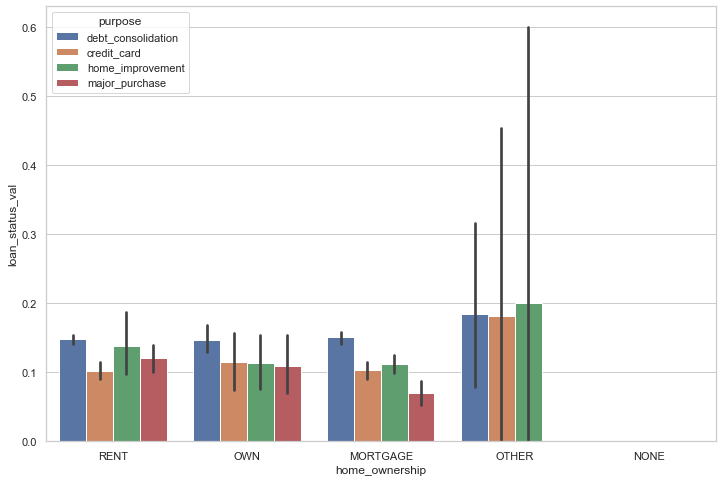

In [87]:
plot_segmented('home_ownership')

In general, debt consolidation loans have the highest default rates. Lets compare across other categories as well.


<b>Categorical Variable: issue_year</b>

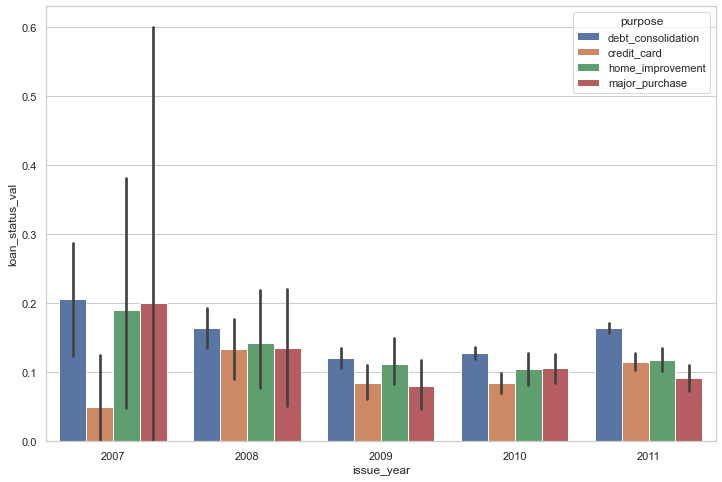

In [95]:
plot_segmented('issue_year')

<b>Categorical Variable: loan_amnt_bin</b>
<p>Here loan_amnt_cat variable will be used for plotting</p>

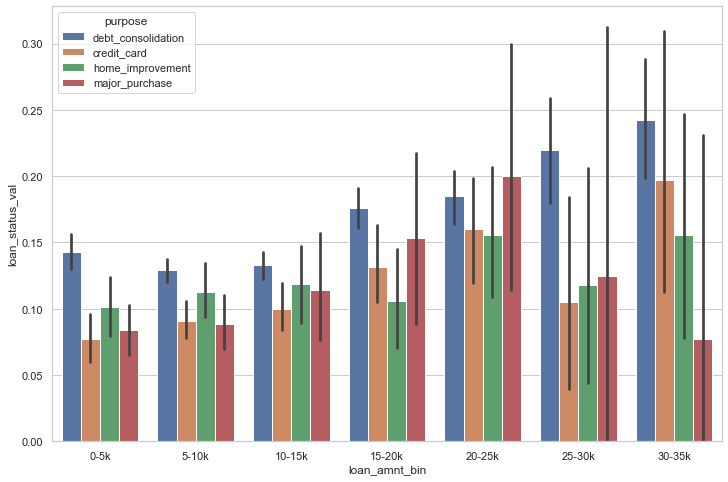

In [90]:
plot_segmented('loan_amnt_bin')

There is no much different, same trend across loan purposes

<b>Categorical Variable: int_rate_cat</b>

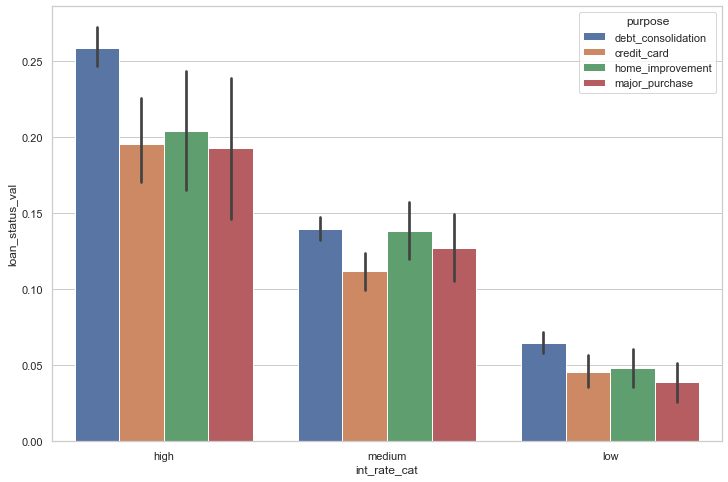

In [91]:
plot_segmented('int_rate_cat')

<b>Categorical Variable: installment_cat</b>

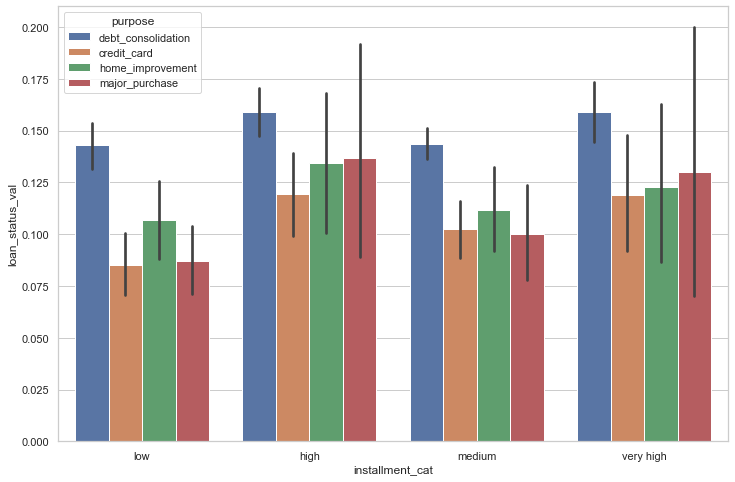

In [92]:
plot_segmented('installment_cat')

<b>Categorical Variable: dti_cat</b>

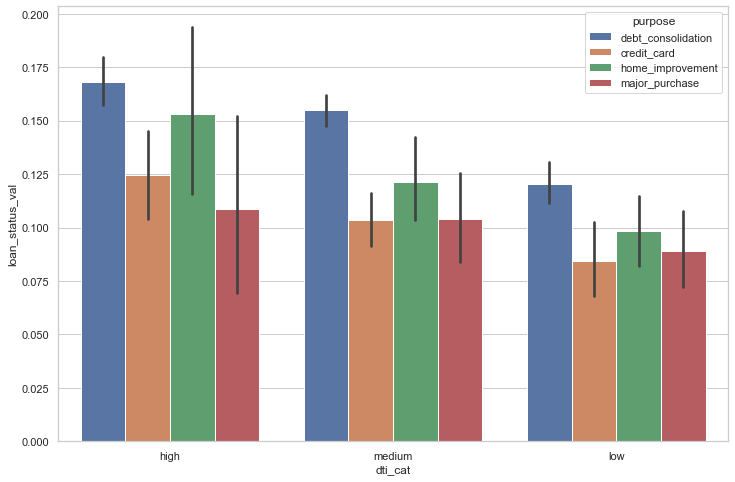

In [93]:
plot_segmented('dti_cat')

<b>Categorical Variable: annual_inc_cat</b>

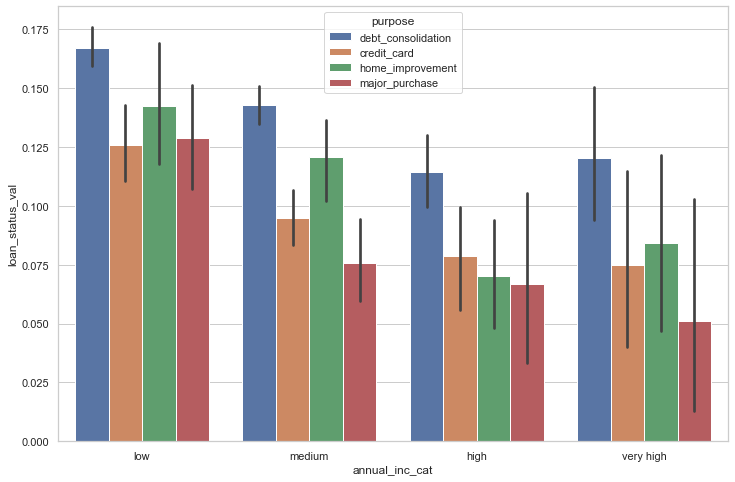

In [94]:
plot_segmented('annual_inc_cat')

<h3 style = "text-align:center">Bivariate Analysis</h3>
<p>In this part of analysis, lets try to analyze the loan status against some important columns which might have played and important role in loan defaults. Lets try to find proportion of loan defaults in some categories. To calculate the proportion of charged off loans, will do these below steps</p>

<b>Income range category vs Loan Status</b>

In [105]:
income_range_vs_loan = loan_df.groupby(['annual_inc_cat', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
income_range_vs_loan['Total'] = income_range_vs_loan['Charged Off'] + income_range_vs_loan['Fully Paid'] 
income_range_vs_loan['Chargedoff_Proportion'] = income_range_vs_loan['Charged Off'] / income_range_vs_loan['Total']
income_range_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,annual_inc_cat,Charged Off,Fully Paid,Total,Chargedoff_Proportion
1,low,1544,8419,9963,0.154973
2,medium,1627,11141,12768,0.127428
3,very high,99,899,998,0.099198
0,high,278,2581,2859,0.097237


<b>Observations:</b>
<li>High income range  has less chances of loan defaults.</li>
<li>Low income range has high chances of loan default.</li>
<li>Therefore, the observation is that, with increase in annual income loan default proportion got decreased.</li>

Lets plot a chart to for the above data.



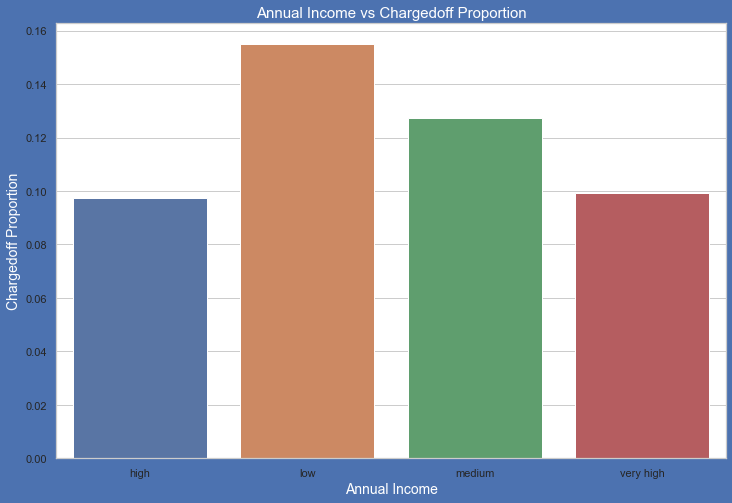

In [109]:
fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='b')
ax1.set_title('Annual Income vs Chargedoff Proportion',fontsize=15,color = 'w')
ax1=sns.barplot(x='annual_inc_cat', y='Chargedoff_Proportion', data=income_range_vs_loan)
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
ax1.set_xlabel('Annual Income',fontsize=14,color='w')
plt.show()

<b>Purpose vs Loan status</b>

In [112]:
purpose_vs_loan = df.groupby(['purpose', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
purpose_vs_loan['Total'] = purpose_vs_loan['Charged Off'] + purpose_vs_loan['Fully Paid'] 
purpose_vs_loan['Chargedoff_Proportion'] = purpose_vs_loan['Charged Off'] / purpose_vs_loan['Total']
purpose_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,purpose,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
11,small_business,372.0,63.0,1031.0,1403.0,0.265146
10,renewable_energy,15.0,1.0,72.0,87.0,0.172414
3,educational,48.0,0.0,244.0,292.0,0.164384
9,other,565.0,113.0,3006.0,3571.0,0.158219
5,house,53.0,13.0,282.0,335.0,0.158209
8,moving,83.0,6.0,451.0,534.0,0.155431
7,medical,96.0,12.0,536.0,632.0,0.151899
2,debt_consolidation,2561.0,560.0,14649.0,17210.0,0.148809
12,vacation,49.0,4.0,288.0,337.0,0.145401
4,home_improvement,305.0,91.0,2356.0,2661.0,0.114619


<b>Observations:</b>
<li>Renewable_energy where loan default proportion is higher when compare to other categories.</li>
<li>small_business applicants have high chances of getting loan defaults.</li>

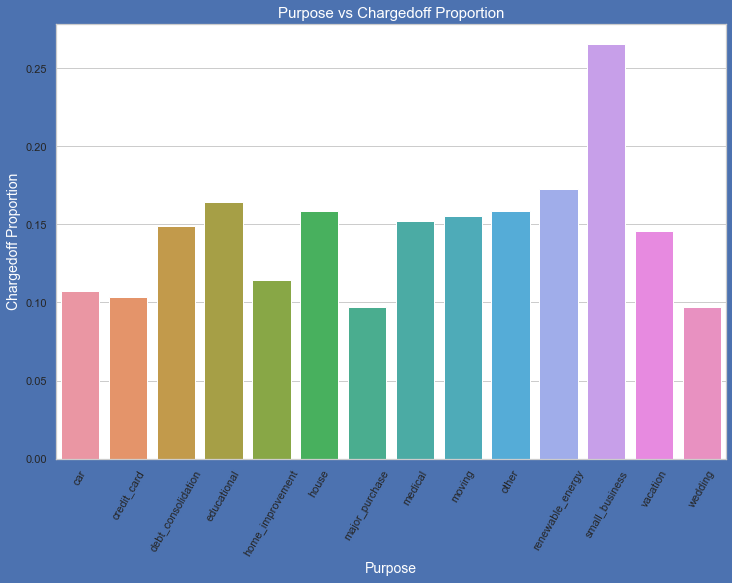

In [119]:
fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='b')
ax1.set_title('Purpose vs Chargedoff Proportion',fontsize=15,color = 'w')
ax1=sns.barplot(x='purpose', y='Chargedoff_Proportion', data=purpose_vs_loan)
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
ax1.set_xlabel('Purpose',fontsize=14,color='w')
plt.xticks(rotation=60) 
plt.show()

<b>Grade vs Loan Status</b>

In [116]:
grade_vs_loan = loan_df.groupby(['grade', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
grade_vs_loan['Total'] = grade_vs_loan['Charged Off'] + grade_vs_loan['Fully Paid'] 
grade_vs_loan['Chargedoff_Proportion'] = grade_vs_loan['Charged Off'] / grade_vs_loan['Total']
grade_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,grade,Charged Off,Fully Paid,Total,Chargedoff_Proportion
5,F,225,481,706,0.318697
6,G,59,147,206,0.286408
4,E,487,1444,1931,0.252201
3,D,735,2887,3622,0.202927
2,C,844,4601,5445,0.155005
1,B,860,7237,8097,0.106212
0,A,338,6243,6581,0.051360


<b>Observations</b>
<li>Grade A has very less loan defaults among all other grades</li>
<li>Grade F has the highest loan defaults among all other grades</li>
<li>It is clearly visible that the borrowers with top grade, brings less risk to the credit.</li>

Let's draw a chart for this data.

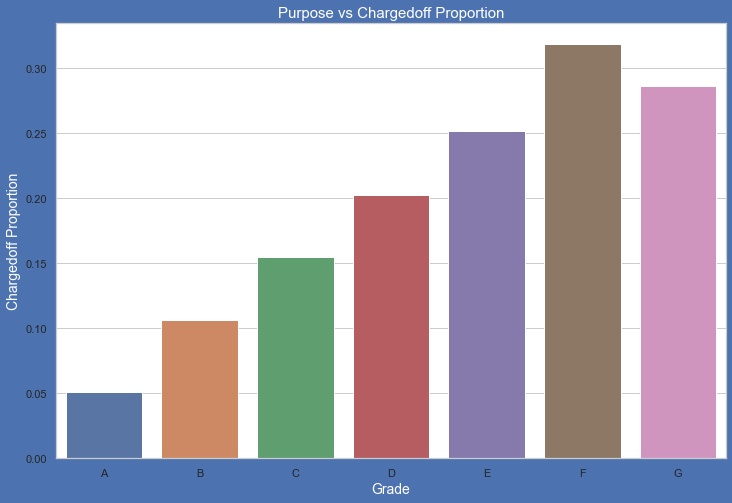

In [120]:
fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='b')
ax1.set_title('Purpose vs Chargedoff Proportion',fontsize=15,color = 'w')
ax1=sns.barplot(x='grade', y='Chargedoff_Proportion', data=grade_vs_loan)
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
ax1.set_xlabel('Grade',fontsize=14,color='w') 
plt.show()

<b>Interest Rate Category vs Loan Status</b>

In [122]:
interest_vs_loan = loan_df.groupby(['int_rate_cat', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
interest_vs_loan['Total'] = interest_vs_loan['Charged Off'] + interest_vs_loan['Fully Paid'] 
interest_vs_loan['Chargedoff_Proportion'] = interest_vs_loan['Charged Off'] / interest_vs_loan['Total']
interest_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,int_rate_cat,Charged Off,Fully Paid,Total,Chargedoff_Proportion
0,high,1392,4349,5741,0.242466
2,medium,1700,11011,12711,0.133742
1,low,456,7680,8136,0.056047


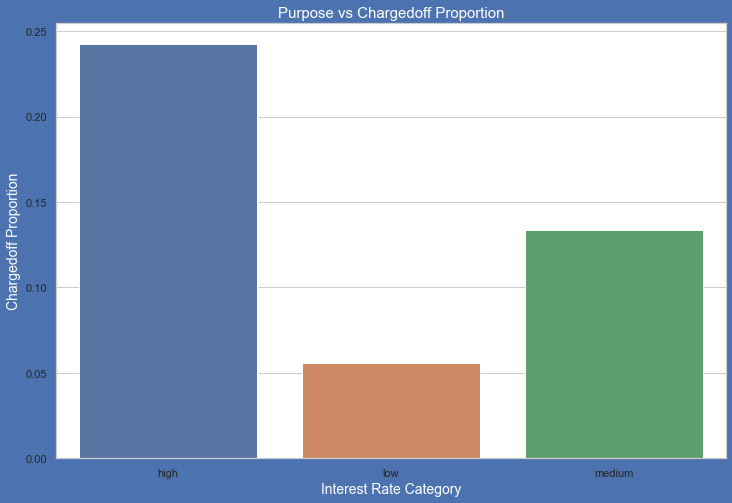

In [123]:
fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='b')
ax1.set_title('Purpose vs Chargedoff Proportion',fontsize=15,color = 'w')
ax1=sns.barplot(x='int_rate_cat', y='Chargedoff_Proportion', data=interest_vs_loan)
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
ax1.set_xlabel('Interest Rate Category',fontsize=14,color='w') 
plt.show()

<b>Observations:</b>
<p>Loan default proportion is increasing with higher intrest rates.</p>